<a href="https://colab.research.google.com/github/KRamBalaji/stock_closing_price_prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Problem Statement**

Predict the closing price of Yes Bank stock based on historical data. This can be framed as a regression problem, where we aim to predict a continuous target variable (closing price).

## **2. Business Context**

* **Investment Strategy:** Predicting stock prices can inform investment decisions, allowing investors to buy or sell stocks based on expected price movements.
* **Risk Management:** Understanding stock price volatility and trends can help manage risk associated with investments.
* **Financial Forecasting:** Accurate stock price predictions can contribute to broader financial forecasting and market analysis.

## **3. Data Understanding**

* **Dataset:** The dataset contains historical daily stock prices for Yes Bank, including the date, opening price, high price, low price, and closing price.
* **Features:**
 * Date: The date of the stock price observation.
 * Open: The opening price of the stock on that day.
 * High: The highest price reached during the trading day.
 * Low: The lowest price reached during the trading day.
 * Close: The closing price of the stock on that day (target variable).
* **Data Source:** The data source is assumed to be reliable and publicly available.

## **4. Dataset Loading and Cleanup**

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/My Drive/data_YesBank_StockPrices.csv')

# Date conversion
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%b-%d', errors='coerce')

Mounted at /content/drive


In [4]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


## **5. Exploratory Data Analysis (EDA)**

In [5]:
# Dataset Rows & Columns
dataset.shape

(185, 5)

In [3]:
dataset.head()

,Date,Open,High,Low,Close
0,1900-07-05,13.00,14.00,11.25,12.46
1,1900-08-05,12.58,14.88,12.55,13.42
2,1900-09-05,13.48,14.87,12.27,13.30
3,1900-10-05,13.20,14.47,12.40,12.99
4,1900-11-05,13.35,13.88,12.88,13.41


### **Descriptive Statistics**

In [6]:
#summary statistics
dataset.describe()

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
mean,1900-06-30 06:13:37.297297408,105.541405,116.104324,94.947838,105.204703
min,1900-01-06 00:00:00,10.000000,11.240000,5.550000,9.980000
25%,1900-04-07 00:00:00,33.800000,36.140000,28.510000,33.450000
50%,1900-07-07 00:00:00,62.980000,72.550000,58.000000,62.540000
75%,1900-10-05 00:00:00,153.000000,169.190000,138.350000,153.300000
max,1900-12-19 00:00:00,369.950000,404.000000,345.500000,367.900000
std,NaN,98.879850,106.333497,91.219415,98.583153


### **Visualizations**

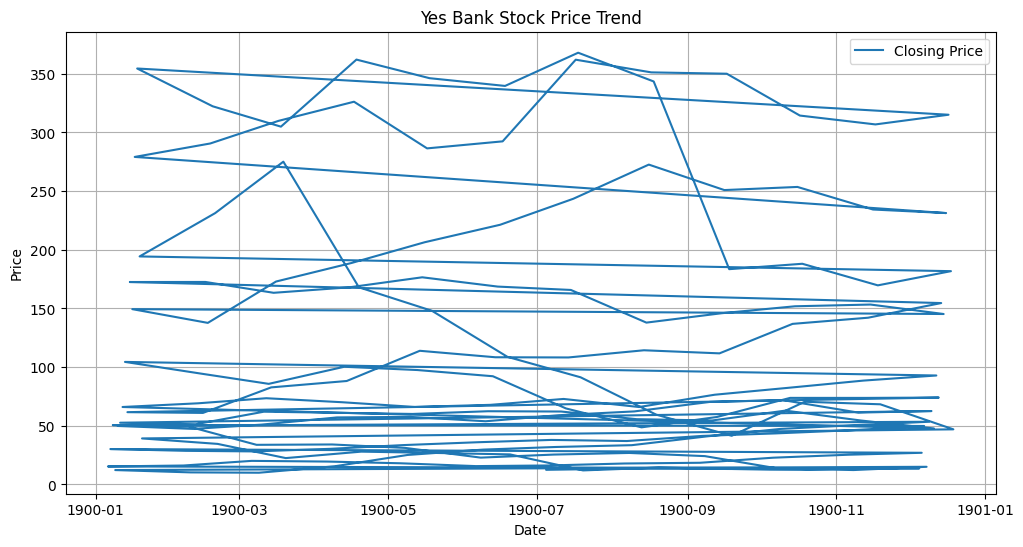

In [9]:
import matplotlib.pyplot as plt

# Create a figure and axes
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the closing price over time
plt.plot(dataset['Date'], dataset['Close'], label='Closing Price')

# Customize the plot
plt.title('Yes Bank Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

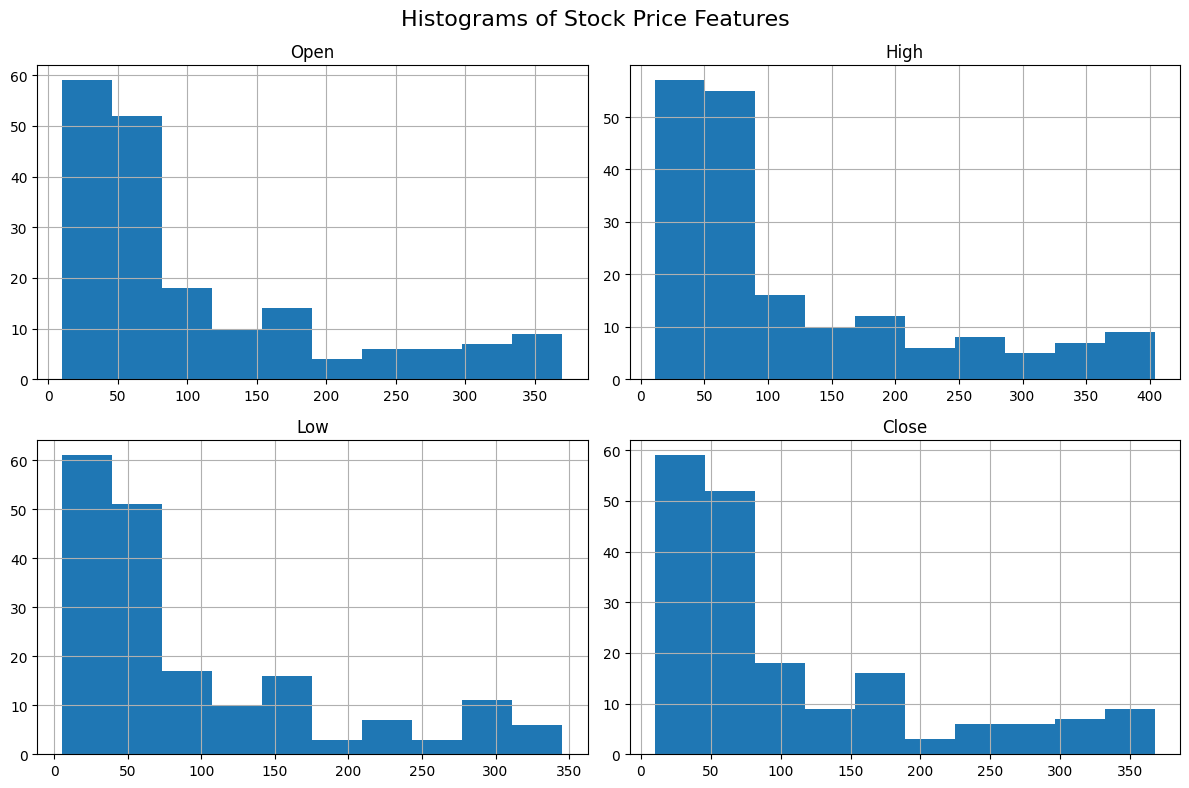

In [10]:
import matplotlib.pyplot as plt

# Create histograms for numerical features
dataset[['Open', 'High', 'Low', 'Close']].hist(figsize=(12, 8))

plt.suptitle('Histograms of Stock Price Features', fontsize=16)
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

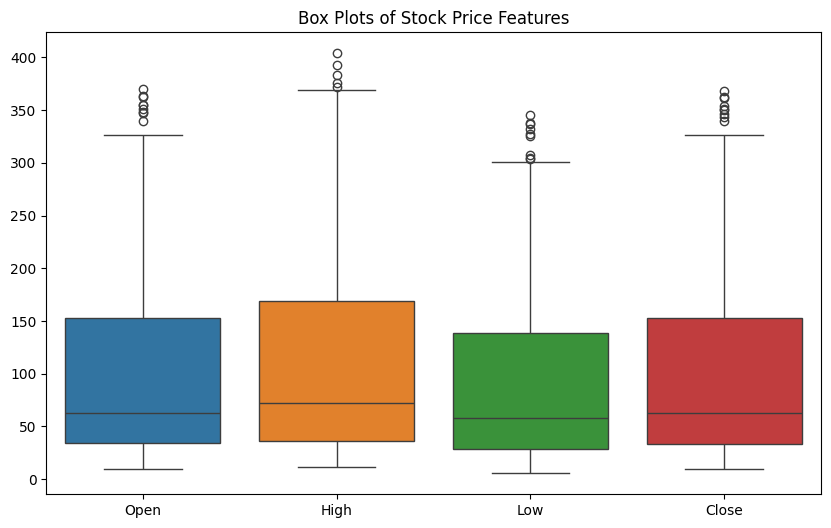

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plots of Stock Price Features')
plt.show()

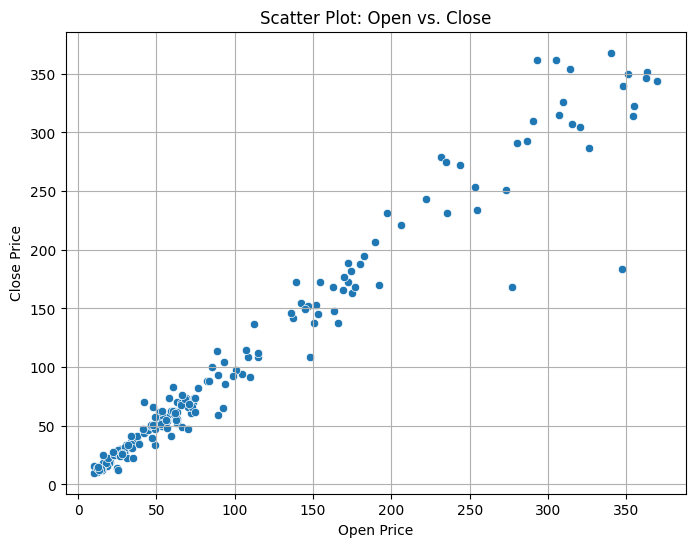

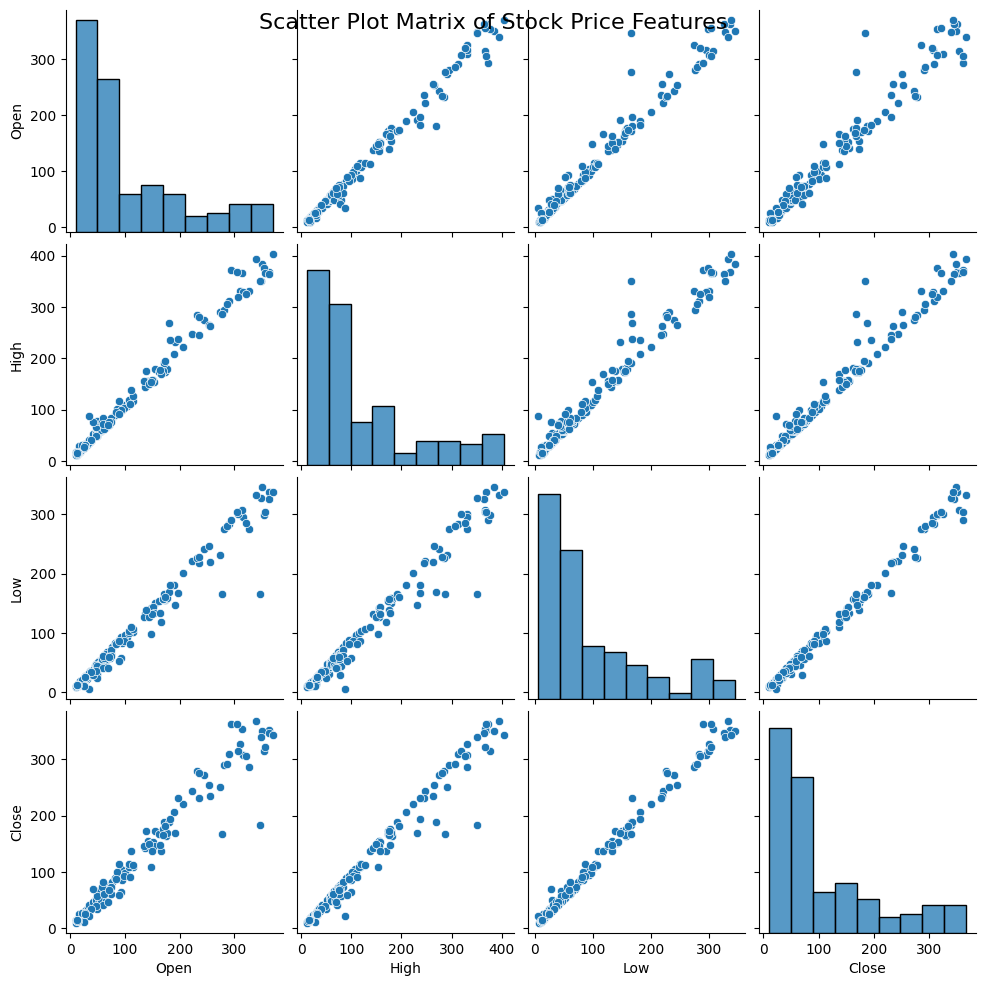

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced visualizations

# Create a scatter plot of 'Open' vs. 'Close'
plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(x='Open', y='Close', data=dataset)  # Using seaborn for better aesthetics
plt.title('Scatter Plot: Open vs. Close')  # Set plot title
plt.xlabel('Open Price')  # Set x-axis label
plt.ylabel('Close Price')  # Set y-axis label
plt.grid(True)  # Add a grid for better readability
plt.show()  # Display the plot


# Create a scatter plot matrix for all numerical features
sns.pairplot(dataset[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Scatter Plot Matrix of Stock Price Features', fontsize=16)
plt.show()

**Patterns and Trends:**

* **Overall Trend:** From the line plot of closing prices, you can observe the general trend of the Yes Bank stock price over time. Is it generally increasing, decreasing, or fluctuating within a range?
* **Seasonality or Cyclical Patterns:** Look for any recurring patterns or cycles in the price movements over time. Are there specific periods where the price tends to rise or fall?
* **Volatility:** Examine the range of price fluctuations. Are there periods of high volatility (large price swings) or low volatility (relatively stable prices)?

**Outliers:**

* **Box Plots:** Outliers are often visually apparent as points lying outside the whiskers of the box plots. These represent extreme values that deviate significantly from the rest of the data.
* **Scatter Plots:** Outliers might also be visible as points that are far away from the general cluster of data points in scatter plots.

**Relationships between Features:**

* **Scatter Plots:** Look for patterns in the scatter plots that indicate relationships between features.
 * **Positive Correlation:** If points tend to cluster along an upward-sloping line, it suggests a positive correlation (when one feature increases, the other tends to increase as well). For example, 'Open' and 'Close' prices might show a positive correlation.
 * **Negative Correlation:** If points cluster along a downward-sloping line, it indicates a negative correlation (when one feature increases, the other tends to decrease).
 * **No Correlation:** If points are scattered randomly, it suggests little or no correlation between the features.
* **Correlation Matrix:** You can calculate a correlation matrix to quantify the strength and direction of relationships between features. Use dataset[['Open', 'High', 'Low', 'Close']].corr() to get the correlation matrix.

**Insights:**

Based on your observations, you can draw insights such as:

* **General price trend and volatility of Yes Bank stock.**
* **Potential seasonal or cyclical patterns in price movements.**
* **Presence of outliers and their potential impact on analysis.**
* **Relationships between features (e.g., Open, High, Low, Close) and their strength.**